In [129]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import FinanceDataReader as fdr
import yfinance as yf
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
import time
import datetime
from openpyxl import load_workbook
from openpyxl.styles import NamedStyle
from selenium.webdriver.common.action_chains import ActionChains
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 Malgun Gothic 폰트 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 마이너스 기호 문제 해결
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호를 유니코드로 렌더링하지 않도록 설정

In [40]:
file_path = "c:/지수비교/지수비교_20250131.xlsx"
date_fr      = '20250101'
date_fr_date = '2025-01-01'
date_to      = '20250117'
date_to_date = '2025-01-17'

KOSPI200

In [43]:
df_kospi200 = fdr.DataReader('KS200',date_fr,date_to) # KOSPI 200 (KRX)
df_kospi200 = df_kospi200.reset_index()
# 날짜의 시간대 정보 제거
df_kospi200['Date'] = df_kospi200['Date'].dt.strftime('%Y-%m-%d')
df_kospi200

# Excel 파일 경로와 시트 이름 설정
sheet_name = "KOSPI200"

# 1. 기존 데이터 로드 및 처리
df_kospi200_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_kospi200_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_kospi200_new['Date'] = df_kospi200_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_kospi200_old = df_kospi200_old.merge(df_kospi200_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_kospi200_old = df_kospi200_old.merge(df_kospi200[['Date', 'Close']], on='Date', how='outer')

# KOSPI200 값이 NaN이고, Close 값이 있는 경우 채우기
df_kospi200_old['KOSPI200'] = df_kospi200_old['KOSPI200'].combine_first(df_kospi200_old['Close'])

# 빈값을 전일 데이터로 채움
df_kospi200_old['KOSPI200'] = df_kospi200_old['KOSPI200'].ffill()

df_kospi200_old = df_kospi200_old[['Date', 'KOSPI200']]

In [45]:
df_kospi200_old

,Date,KOSPI200
0,1983-01-04,122.52
1,1983-01-05,122.56
2,1983-01-06,122.81
3,1983-01-07,121.09
4,1983-01-08,120.71
...,...,...
15372,2025-01-13,330.31
15373,2025-01-14,330.74
15374,2025-01-15,330.97
15375,2025-01-16,335.73


In [10]:
df_kospi200_old.dtypes

Date         object
KOSPI200    float64
dtype: object

S&P500

In [49]:
# S&P 500 티커 심볼 설정 및 데이터 가져오기
ticker = "^GSPC"
df_sp500 = yf.download(ticker, start=date_fr_date, end=date_to_date)  # 종료 날짜 설정
df_sp500 = df_sp500.reset_index()

# 불필요한 열을 제거하고 열 이름 변경
df_sp500 = df_sp500[['Date', 'Close', 'Adj Close', 'High', 'Low', 'Open', 'Volume']]
df_sp500.columns = ['Date', 'Close', 'Adj_Close', 'High', 'Low', 'Open', 'Volume']

# 날짜의 시간대 정보 제거
df_sp500['Date'] = df_sp500['Date'].dt.strftime('%Y-%m-%d')

# Excel 파일 경로와 시트 이름 설정
sheet_name = "S&P 500"

# 1. 기존 데이터 로드 및 처리
df_sp500_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_sp500_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_sp500_new['Date'] = df_sp500_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_sp500_old = df_sp500_old.merge(df_sp500_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_sp500_old = df_sp500_old.merge(df_sp500[['Date', 'Close']], on='Date', how='outer')

# S&P500 값이 NaN이고, Close 값이 있는 경우 채우기
df_sp500_old['S&P500'] = df_sp500_old['S&P500'].combine_first(df_sp500_old['Close'])

# 빈값을 전일 데이터로 채움
df_sp500_old['S&P500'] = df_sp500_old['S&P500'].ffill()

df_sp500_old = df_sp500_old[['Date', 'S&P500']]

[*********************100%%**********************]  1 of 1 completed


In [51]:
df_sp500_old

,Date,S&P500
0,1996-01-08,618.460022
1,1996-01-09,609.450012
2,1996-01-10,598.479980
3,1996-01-11,602.690002
4,1996-01-12,601.809998
...,...,...
10598,2025-01-13,5836.220215
10599,2025-01-14,5842.910156
10600,2025-01-15,5949.910156
10601,2025-01-16,5937.339844


In [53]:
df_sp500_old.dtypes

Date       object
S&P500    float64
dtype: object

국고3년/회사채3년 : http://www.kofiabond.or.kr/-sitemap-시가평가-채권시가평가기준수익률

국고3년

In [57]:
# ChromeDriver 설정
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

data = []  # 데이터 저장을 위한 리스트 생성

try:
    # Kofia Bond 웹사이트로 이동
    url = 'https://www.kofiabond.or.kr/websquare/websquare.html?w2xPath=/xml/Com/Common_TabMnuDsp.xml&divisionId=MBIS01070010000000&serviceId=BIS0100100280&topMenuIndex=7&w2xHome=/xml/&w2xDocumentRoot=#tabContents1_contents_tabs2_bridge'
    driver.get(url)

    # 메인 콘텐츠 iframe으로 전환 (tabContents1_contents_tabs1_body)
    WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.ID, "tabContents1_contents_tabs1_body")))

    # 기본 콘텐츠로 돌아가 "기간별" 탭 선택
    driver.switch_to.default_content()
    period_tab = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "tabContents1_tab_tabs2"))
    )
    period_tab.click()

    # "기간별" 탭과 관련된 iframe으로 전환 (tabContents1_contents_tabs2_body)
    WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.ID, "tabContents1_contents_tabs2_body")))

    # 시작 날짜 및 종료 날짜 설정
    start_date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "schSstandardDt_input")))
    start_date.clear()
    start_date.send_keys(date_fr)  # 시작 날짜

    end_date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "schEstandardDt_input")))
    end_date.clear()
    end_date.send_keys(date_to)  # 종료 날짜

    # 드롭다운에서 "회사채 I(공모사채) /무보증 /BBB-" 선택
    dropdown_main = Select(WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "selectBndTyp1_input_0"))
    ))
    dropdown_main.select_by_visible_text("국채/국고채권/양곡,외평,재정")

    # 인접 드롭다운에서 "3년" 선택
    dropdown_duration = Select(WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "selectTrm1_input_0"))
    ))
    dropdown_duration.select_by_visible_text("3년")

    # 각 체크박스 선택
    checkbox_ids = [
        "checkbox1_input_0",
        "checkbox2_input_0",
        "checkbox3_input_0",
        "checkbox4_input_0",
        "checkbox5_input_0"
    ]
    for checkbox_id in checkbox_ids:
        checkbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, checkbox_id)))
        if not checkbox.is_selected():
            checkbox.click()

    # "조회" 버튼 클릭
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "image1"))
    )
    search_button.click()

    # 결과가 로드될 때까지 대기
    time.sleep(3)

    # 동적 스크롤 실행 및 데이터 수집
    scrollable_div = driver.find_element(By.CSS_SELECTOR, "#grdMain2_scrollY_div")
    last_height = 0

    while True:
        # 현재 데이터 수집
        table_rows = driver.find_elements(By.CSS_SELECTOR, "#grdMain2_body_tbody tr")

        for row in table_rows:
            try:
                date = row.find_element(By.CSS_SELECTOR, "td[col_id='standardDt']").text
                value = row.find_element(By.CSS_SELECTOR, "td[col_id='val6']").text
                if {"Date": date, "Value": value} not in data:  # 중복 데이터 방지
                    data.append({"Date": date, "Value": value})
            except Exception as e:
                print(f"해당 행에서 요소를 찾을 수 없습니다: {e}")
                continue

        # 스크롤 다운
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", scrollable_div)
        time.sleep(1)  # 데이터 로드 시간 확보

        # 새로운 높이 계산
        new_height = driver.execute_script("return arguments[0].scrollTop;", scrollable_div)
        if new_height == last_height:
            break  # 스크롤이 더 이상 진행되지 않으면 종료
        last_height = new_height

    # DataFrame으로 변환
    df_tb3 = pd.DataFrame(data)
    df_tb3["Value"] = pd.to_numeric(df_tb3["Value"], errors='coerce')
    df_tb3['Date'] = df_tb3['Date'].str.replace('/', '-')
    df_tb3.rename(columns={"Value": "Yield"}, inplace=True)

    # df_tb3을 오름차순으로 정렬
    df_tb3 = df_tb3.sort_values(by='Date', ascending=True)  # 'Column_Name'을 정렬할 열의 이름으로 변경

    # Date 컬럼이 null이 아닌 행만 필터링하여 저장
    df_tb3 = df_tb3[df_tb3['Yield'].notna()]
  
    # 결과 확인
    print(df_tb3)

except Exception as e:
    print("오류 발생:", str(e))

finally:
    driver.quit()

          Date  Yield
11  2025-01-02  2.501
10  2025-01-03  2.470
9   2025-01-06  2.523
8   2025-01-07  2.511
7   2025-01-08  2.500
6   2025-01-09  2.496
5   2025-01-10  2.570
4   2025-01-13  2.665
3   2025-01-14  2.647
2   2025-01-15  2.680
1   2025-01-16  2.625
0   2025-01-17  2.587


In [59]:
# Excel 파일 경로와 시트 이름 설정
sheet_name = "국고3년"

# 1. 기존 데이터 로드 및 처리
df_tb3_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_tb3_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_tb3_new['Date'] = df_tb3_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_tb3_old = df_tb3_old.merge(df_tb3_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_tb3_old = df_tb3_old.merge(df_tb3[['Date', 'Yield']], on='Date', how='outer')

# 국고3년 값이 NaN이고, Close 값이 있는 경우 채우기
df_tb3_old['국고3년'] = df_tb3_old['국고3년'].combine_first(df_tb3_old['Yield'])

# 빈값을 전일 데이터로 채움
df_tb3_old['국고3년'] = df_tb3_old['국고3년'].ffill()

df_tb3_old = df_tb3_old[['Date', '국고3년']]
df_tb3_old

,Date,국고3년
0,1998-06-01,16.700
1,1998-06-02,16.580
2,1998-06-03,16.560
3,1998-06-04,16.560
4,1998-06-05,16.530
...,...,...
9730,2025-01-13,2.665
9731,2025-01-14,2.647
9732,2025-01-15,2.680
9733,2025-01-16,2.625


In [61]:
df_tb3_old.dtypes

Date     object
국고3년    float64
dtype: object

회사채3년

In [63]:
# ChromeDriver 설정
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

data = []  # 데이터 저장을 위한 리스트 생성

try:
    # Kofia Bond 웹사이트로 이동
    url = 'https://www.kofiabond.or.kr/websquare/websquare.html?w2xPath=/xml/Com/Common_TabMnuDsp.xml&divisionId=MBIS01070010000000&serviceId=BIS0100100280&topMenuIndex=7&w2xHome=/xml/&w2xDocumentRoot=#tabContents1_contents_tabs2_bridge'
    driver.get(url)

    # 메인 콘텐츠 iframe으로 전환 (tabContents1_contents_tabs1_body)
    WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.ID, "tabContents1_contents_tabs1_body")))

    # 기본 콘텐츠로 돌아가 "기간별" 탭 선택
    driver.switch_to.default_content()
    period_tab = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "tabContents1_tab_tabs2"))
    )
    period_tab.click()

    # "기간별" 탭과 관련된 iframe으로 전환 (tabContents1_contents_tabs2_body)
    WebDriverWait(driver, 10).until(EC.frame_to_be_available_and_switch_to_it((By.ID, "tabContents1_contents_tabs2_body")))

    # 시작 날짜 및 종료 날짜 설정
    start_date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "schSstandardDt_input")))
    start_date.clear()
    start_date.send_keys(date_fr)  # 시작 날짜

    end_date = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "schEstandardDt_input")))
    end_date.clear()
    end_date.send_keys(date_to)  # 종료 날짜

    # 드롭다운에서 "회사채 I(공모사채) /무보증 /BBB-" 선택
    dropdown_main = Select(WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "selectBndTyp1_input_0"))
    ))
    dropdown_main.select_by_visible_text("회사채 I(공모사채) /무보증 /BBB-")

    # 인접 드롭다운에서 "3년" 선택
    dropdown_duration = Select(WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "selectTrm1_input_0"))
    ))
    dropdown_duration.select_by_visible_text("3년")

    # 각 체크박스 선택
    checkbox_ids = [
        "checkbox1_input_0",
        "checkbox2_input_0",
        "checkbox3_input_0",
        "checkbox4_input_0",
        "checkbox5_input_0"
    ]
    for checkbox_id in checkbox_ids:
        checkbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, checkbox_id)))
        if not checkbox.is_selected():
            checkbox.click()

    # "조회" 버튼 클릭
    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.ID, "image1"))
    )
    search_button.click()

    # 결과가 로드될 때까지 대기
    time.sleep(3)

    # 동적 스크롤 실행 및 데이터 수집
    scrollable_div = driver.find_element(By.CSS_SELECTOR, "#grdMain2_scrollY_div")
    last_height = 0

    while True:
        # 현재 데이터 수집
        table_rows = driver.find_elements(By.CSS_SELECTOR, "#grdMain2_body_tbody tr")

        for row in table_rows:
            try:
                date = row.find_element(By.CSS_SELECTOR, "td[col_id='standardDt']").text
                value = row.find_element(By.CSS_SELECTOR, "td[col_id='val6']").text
                if {"Date": date, "Value": value} not in data:  # 중복 데이터 방지
                    data.append({"Date": date, "Value": value})
            except Exception as e:
                print(f"해당 행에서 요소를 찾을 수 없습니다: {e}")
                continue

        # 스크롤 다운
        driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight;", scrollable_div)
        time.sleep(1)  # 데이터 로드 시간 확보

        # 새로운 높이 계산
        new_height = driver.execute_script("return arguments[0].scrollTop;", scrollable_div)
        if new_height == last_height:
            break  # 스크롤이 더 이상 진행되지 않으면 종료
        last_height = new_height

    # DataFrame으로 변환
    df_cb3 = pd.DataFrame(data)
    df_cb3["Value"] = pd.to_numeric(df_cb3["Value"], errors='coerce')
    df_cb3['Date'] = df_cb3['Date'].str.replace('/', '-')
    df_cb3.rename(columns={"Value": "Yield"}, inplace=True)

    # Date 컬럼이 null이 아닌 행만 필터링하여 저장
    df_cb3 = df_cb3[df_cb3['Yield'].notna()]

    # df_cb3을 오름차순으로 정렬
    df_cb3 = df_cb3.sort_values(by='Date', ascending=True)  # 'Column_Name'을 정렬할 열의 이름으로 변경

    # 결과 확인
    print(df_cb3)

except Exception as e:
    print("오류 발생:", str(e))

finally:
    driver.quit()

          Date  Yield
11  2025-01-02  8.954
10  2025-01-03  8.920
9   2025-01-06  8.973
8   2025-01-07  8.957
7   2025-01-08  8.941
6   2025-01-09  8.931
5   2025-01-10  8.997
4   2025-01-13  9.082
3   2025-01-14  9.063
2   2025-01-15  9.093
1   2025-01-16  9.034
0   2025-01-17  8.995


In [65]:
# Excel 파일 경로와 시트 이름 설정
sheet_name = "회사채BBB-3년"

# 1. 기존 데이터 로드 및 처리
df_cb3_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_cb3_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_cb3_new['Date'] = df_cb3_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_cb3_old = df_cb3_old.merge(df_cb3_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_cb3_old = df_cb3_old.merge(df_cb3[['Date', 'Yield']], on='Date', how='outer')

# 회사채BBB-3년 값이 NaN이고, Close 값이 있는 경우 채우기
df_cb3_old['회사채BBB-3년'] = df_cb3_old['회사채BBB-3년'].combine_first(df_cb3_old['Yield'])

# 빈값을 전일 데이터로 채움
df_cb3_old['회사채BBB-3년'] = df_cb3_old['회사채BBB-3년'].ffill()

df_cb3_old = df_cb3_old[['Date', '회사채BBB-3년']]

df_cb3_old = pd.merge(df_cb3_old, df_tb3_old[['Date', '국고3년']], on='Date', how='left')

# '신용스프레드' 컬럼 계산: 회사채BBB-3년 - 국고3년
df_cb3_old['신용스프레드'] = df_cb3_old['회사채BBB-3년'] - df_cb3_old['국고3년']

# df_cb3_old = df_cb3_old[['Date', '회사채BBB-3년']]
df_cb3_old

,Date,회사채BBB-3년,국고3년,신용스프레드
0,2000-10-30,11.780,7.690,4.090
1,2000-10-31,11.780,7.720,4.060
2,2000-11-01,11.780,7.720,4.060
3,2000-11-02,11.830,7.700,4.130
4,2000-11-03,11.830,7.700,4.130
...,...,...,...,...
8890,2025-01-13,9.082,2.665,6.417
8891,2025-01-14,9.063,2.647,6.416
8892,2025-01-15,9.093,2.680,6.413
8893,2025-01-16,9.034,2.625,6.409


In [67]:
df_cb3_old.dtypes

Date          object
회사채BBB-3년    float64
국고3년         float64
신용스프레드       float64
dtype: object

PSR

In [69]:
# Selenium WebDriver 설정
driver = webdriver.Chrome()  # Chrome WebDriver 사용

# 페이지 URL
url = "https://www.gurufocus.com/economic_indicators/4238/sp-500-price-to-sales"

# Selenium으로 URL 열기
driver.get(url)

# 페이지가 완전히 로드될 때까지 대기 (시간 조절 가능)
time.sleep(3)  # 페이지 로딩 시간을 충분히 줌

# 데이터를 저장할 리스트
all_rows = []

# 단일 페이지를 스크래핑하는 함수
def scrape_page():
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    # 주어진 ID로 테이블 찾기
    table = soup.find("table", {"id": "non-sticky-table"})

    if table:
        # 테이블 헤더(열) 추출
        headers = [th.get_text().strip() for th in table.find_all("th")]

        # 테이블 행(데이터) 추출
        for tr in table.find_all("tr"):
            td_elements = tr.find_all("td")
            if len(td_elements) > 0:
                row = [td.get_text().strip() for td in td_elements]
                all_rows.append(row)

    return headers

# 첫 페이지에서 데이터 추출
headers = scrape_page()

# 현재 페이지 번호 초기화
current_page = 1

# 다음 페이지로 이동하는 함수
def go_to_next_page(current_page):
    try:
        # 다음 페이지 번호 계산
        next_page_number = current_page + 1

        # 다음 페이지 버튼 요소 찾기
        next_page = driver.find_elements(By.XPATH, f'//ul[@class="el-pager"]/li[@class="number" and text()="{next_page_number}"]')
        
        # 다음 페이지 버튼이 없으면 종료
        if not next_page:
            return False, current_page

        # 다음 페이지 버튼이 있으면 클릭
        next_page = next_page[0]
        
        # 요소를 스크롤하여 클릭 가능하게 만들기
        driver.execute_script("arguments[0].scrollIntoView();", next_page)
        # JavaScript를 사용하여 요소 클릭
        driver.execute_script("arguments[0].click();", next_page)
        time.sleep(3)  # 다음 페이지가 로드될 때까지 대기
        return True, next_page_number
    except Exception as e:
        print(f"다음 페이지로 이동 중 오류 발생: {e}")
        return False, current_page

# 여러 페이지를 반복하여 스크래핑 (2번째 페이지까지만 조회)
while current_page <= 2:
    # 현재 페이지 스크래핑
    scrape_page()

    # 다음 페이지로 이동 (불가능할 경우 반복문 종료)
    success, current_page = go_to_next_page(current_page)
    if not success:
        break

# 스크래핑 후 드라이버 종료
driver.quit()

# 스크래핑한 데이터로 DataFrame 생성
df_psr = pd.DataFrame(all_rows, columns=headers)

# 'Date' 컬럼을 datetime 형식으로 변환
df_psr['Date'] = pd.to_datetime(df_psr['Date'])

# 'Date'가 2025-01-01보다 큰 데이터만 필터링
df_psr = df_psr[df_psr['Date'] > date_fr_date]

# 'Date' 컬럼을 object 타입 (문자열)으로 변환
df_psr['Date'] = df_psr['Date'].astype(str)

# 'Value' 컬럼을 float 타입으로 변환
df_psr['Value'] = df_psr['Value'].astype(float)

# 중복된 행을 제거 (Date와 Value 기준)
df_psr = df_psr.drop_duplicates(subset=['Date', 'Value'])

# 'Date'와 'Value' 컬럼만 선택
df_psr = df_psr[['Date', 'Value']]

# DataFrame 출력
print(df_psr)

         Date  Value
0  2025-01-16  3.093
1  2025-01-15  3.100
2  2025-01-14  3.044
3  2025-01-13  3.041
4  2025-01-10  3.036
5  2025-01-08  3.083
6  2025-01-07  3.079
7  2025-01-06  3.113
8  2025-01-03  3.096
9  2025-01-02  3.058


In [71]:
df_psr.dtypes

Date      object
Value    float64
dtype: object

In [73]:
# Excel 파일 경로와 시트 이름 설정
sheet_name = "PSR"

# 1. 기존 데이터 로드 및 처리
df_psr_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_psr_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_psr_new['Date'] = df_psr_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_psr_old = df_psr_old.merge(df_psr_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_psr_old = df_psr_old.merge(df_psr[['Date', 'Value']], on='Date', how='outer')

# PSR 값이 NaN이고, Close 값이 있는 경우 채우기
df_psr_old['PSR'] = df_psr_old['PSR'].combine_first(df_psr_old['Value'])

# 빈값을 전일 데이터로 채움
df_psr_old['PSR'] = df_psr_old['PSR'].ffill()

df_psr_old = df_psr_old[['Date', 'PSR']]

# 'PSR' 컬럼을 float로 변환
df_psr_old['PSR'] = pd.to_numeric(df_psr_old['PSR'], errors='coerce')

df_psr_old

,Date,PSR
0,2001-01-02,1.721
1,2001-01-03,1.807
2,2001-01-04,1.788
3,2001-01-05,1.741
4,2001-01-06,1.741
...,...,...
8777,2025-01-13,3.041
8778,2025-01-14,3.044
8779,2025-01-15,3.100
8780,2025-01-16,3.093


환율

In [75]:
url = 'http://ecos.bok.or.kr/api/StatisticSearch/W9W3357LS1EA7R4T62M5/xml/kr/1/5000/731Y003/D/'+date_fr+'/'+date_to+'/0000003/'
# lxml 패키지를 사용하도록 BeautifulSoup 설정
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml-xml')  # 또는 soup = BeautifulSoup(response.content, features="xml")

# 데이터 추출
data = []
rows = soup.find_all('row')
for row in rows:
    date = row.find('TIME').text
    exchange_rate = row.find('DATA_VALUE').text
    data.append([date, exchange_rate])

# DataFrame 생성
df_exchange_rate = pd.DataFrame(data, columns=['Date', 'Exchange_Rate'])
# 날짜 포맷 변경
df_exchange_rate['Date'] = df_exchange_rate['Date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")

df_exchange_rate

,Date,Exchange_Rate
0,2025-01-02,1466.6
1,2025-01-03,1468.4
2,2025-01-06,1469.7
3,2025-01-07,1453.5
4,2025-01-08,1455
5,2025-01-09,1460.5
6,2025-01-10,1465
7,2025-01-13,1470.8
8,2025-01-14,1463.2
9,2025-01-15,1461.2


In [77]:
# Excel 파일 경로와 시트 이름 설정
sheet_name = "환율"

# 1. 기존 데이터 로드 및 처리
df_exchange_rate_old = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 당월 데이터 생성
df_exchange_rate_new = pd.DataFrame({'Date': pd.date_range(start=date_fr_date, end=date_to_date, freq='D')})

# Date 컬럼을 문자열로 변경
df_exchange_rate_new['Date'] = df_exchange_rate_new['Date'].astype(str)

# 기존 데이터에 당월 신규
df_exchange_rate_old = df_exchange_rate_old.merge(df_exchange_rate_new, on='Date', how='outer')

# Date를 기준으로 병합 (full outer join)
df_exchange_rate_old = df_exchange_rate_old.merge(df_exchange_rate[['Date', 'Exchange_Rate']], on='Date', how='outer')

# 종가환율 값이 NaN이고, Close 값이 있는 경우 채우기
df_exchange_rate_old['종가환율'] = df_exchange_rate_old['종가환율'].combine_first(df_exchange_rate_old['Exchange_Rate'])

# 빈값을 전일 데이터로 채움
df_exchange_rate_old['종가환율'] = df_exchange_rate_old['종가환율'].ffill()

df_exchange_rate_old = df_exchange_rate_old[['Date', '종가환율']]

# '종가환율' 컬럼을 float로 변환
df_exchange_rate_old['종가환율'] = pd.to_numeric(df_exchange_rate_old['종가환율'], errors='coerce')

df_exchange_rate_old

,Date,종가환율
0,1990-03-02,693.0
1,1990-03-03,693.0
2,1990-03-04,693.0
3,1990-03-05,695.1
4,1990-03-06,696.4
...,...,...
12736,2025-01-13,1470.8
12737,2025-01-14,1463.2
12738,2025-01-15,1461.2
12739,2025-01-16,1456.7


In [79]:
df_exchange_rate_old.dtypes

Date     object
종가환율    float64
dtype: object

KOSPI200,S&P 500,국고3년,회사채BBB-3년,PSR,종가환율 저장

In [81]:
sheet_name = "KOSPI200"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_kospi200_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'KOSPI200' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [82]:
sheet_name = "S&P 500"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_sp500_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'S&P 500' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [83]:
sheet_name = "국고3년"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_tb3_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'국고3년' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [84]:
sheet_name = "회사채BBB-3년"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_cb3_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'회사채BBB-3년' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [85]:
sheet_name = "PSR"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_psr_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'PSR' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [86]:
sheet_name = "환율"

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_exchange_rate_old.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")

'환율' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


주요지수 비교 구성

In [88]:
# 각 데이터프레임을 'Date' 기준으로 병합 (2001-12-31 이후만 포함)
df_index = pd.merge(df_kospi200_old, df_sp500_old, on='Date', how='inner')
df_index = pd.merge(df_index, df_tb3_old, on='Date', how='inner')
df_index = pd.merge(df_index, df_cb3_old, on='Date', how='inner')
df_index = pd.merge(df_index, df_psr_old, on='Date', how='inner')
df_index = pd.merge(df_index, df_exchange_rate_old, on='Date', how='inner')

# Date 컬럼을 기준으로 2001-12-31 이후 데이터만 선택
df_index = df_index[df_index['Date'] >= '2001-12-31']

# 결과 확인
print(df_index.head())

           Date  KOSPI200       S&P500  국고3년_x  회사채BBB-3년  국고3년_y  신용스프레드  \
363  2001-12-31     86.97  1148.079956    5.90      11.06    5.90    5.16   
364  2002-01-01     86.97  1148.079956    5.90      11.06    5.90    5.16   
365  2002-01-02     91.18  1154.670044    6.16      11.25    6.16    5.09   
366  2002-01-03     91.52  1165.270020    6.16      11.25    6.16    5.09   
367  2002-01-04     94.24  1172.510010    6.17      11.19    6.17    5.02   

       PSR    종가환율  
363  1.558  1313.5  
364  1.558  1313.5  
365  1.567  1317.4  
366  1.581  1312.7  
367  1.591  1308.7  


In [89]:
# '국고3년_y' 컬럼 삭제
df_index.drop(columns=['국고3년_y'], inplace=True)

# '국고3년_x' 컬럼을 '국고3년'으로 이름 변경
df_index.rename(columns={'국고3년_x': '국고3년'}, inplace=True)

# 결과 확인
print(df_index.head())

           Date  KOSPI200       S&P500  국고3년  회사채BBB-3년  신용스프레드    PSR    종가환율
363  2001-12-31     86.97  1148.079956  5.90      11.06    5.16  1.558  1313.5
364  2002-01-01     86.97  1148.079956  5.90      11.06    5.16  1.558  1313.5
365  2002-01-02     91.18  1154.670044  6.16      11.25    5.09  1.567  1317.4
366  2002-01-03     91.52  1165.270020  6.16      11.25    5.09  1.581  1312.7
367  2002-01-04     94.24  1172.510010  6.17      11.19    5.02  1.591  1308.7


수익률 컬럼 추가

In [91]:
# KOSPI200 일수익률 계산
df_index['KOSPI200_일수익률'] = (df_index['KOSPI200'] - df_index['KOSPI200'].shift(1)) / df_index['KOSPI200'].shift(1)

# S&P500 일수익률 계산
df_index['S&P500_일수익률'] = (df_index['S&P500'] - df_index['S&P500'].shift(1)) / df_index['S&P500'].shift(1)

# 종가환율 일수익률 계산
df_index['종가환율_일수익률'] = (df_index['종가환율'] - df_index['종가환율'].shift(1)) / df_index['종가환율'].shift(1)

# S&P500 (환율) 일수익률 계산
df_index['S&P500_일수익률_환율'] = df_index['S&P500_일수익률'] + df_index['종가환율_일수익률']

# 결과 확인
print(df_index.head())

           Date  KOSPI200       S&P500  국고3년  회사채BBB-3년  신용스프레드    PSR  \
363  2001-12-31     86.97  1148.079956  5.90      11.06    5.16  1.558   
364  2002-01-01     86.97  1148.079956  5.90      11.06    5.16  1.558   
365  2002-01-02     91.18  1154.670044  6.16      11.25    5.09  1.567   
366  2002-01-03     91.52  1165.270020  6.16      11.25    5.09  1.581   
367  2002-01-04     94.24  1172.510010  6.17      11.19    5.02  1.591   

       종가환율  KOSPI200_일수익률  S&P500_일수익률  종가환율_일수익률  S&P500_일수익률_환율  
363  1313.5            NaN          NaN        NaN             NaN  
364  1313.5       0.000000     0.000000   0.000000        0.000000  
365  1317.4       0.048407     0.005740   0.002969        0.008709  
366  1312.7       0.003729     0.009180  -0.003568        0.005612  
367  1308.7       0.029720     0.006213  -0.003047        0.003166  


In [93]:
# Date 컬럼을 기준으로 2001-12-31 이후 데이터만 선택
df_index = df_index[df_index['Date'] >= '2002-01-01']

신용스프레드순위

In [95]:
# 신용스프레드 오름으로 순위 매기기
df_index['신용스프레드순위'] = df_index['신용스프레드'].rank(ascending=True, method='min')

PSR순위

In [97]:
# PSR 순위 오름차순으로 매기기
df_index['PSR순위'] = df_index['PSR'].rank(ascending=True, method='min')

In [135]:
df_index

,Date,KOSPI200,S&P500,국고3년,회사채BBB-3년,신용스프레드,PSR,종가환율,KOSPI200_일수익률,S&P500_일수익률,종가환율_일수익률,S&P500_일수익률_환율,신용스프레드순위,PSR순위,적정국내주식비중,적정해외주식비중
364,2002-01-01,86.97,1148.079956,5.900,11.060,5.160,1.558,1313.5,0.000000,0.000000,0.000000,0.000000,2122,4026,0.19960,0.24282
365,2002-01-02,91.18,1154.670044,6.160,11.250,5.090,1.567,1317.4,0.048407,0.005740,0.002969,0.008709,2092,4117,0.19872,0.24548
366,2002-01-03,91.52,1165.270020,6.160,11.250,5.090,1.581,1312.7,0.003729,0.009180,-0.003568,0.005612,2092,4222,0.19872,0.24855
367,2002-01-04,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.029720,0.006213,-0.003047,0.003166,2021,4269,0.19664,0.24993
368,2002-01-05,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.000000,0.000000,0.000000,0.000000,2021,4269,0.19664,0.24993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,2025-01-13,330.31,5836.220215,2.665,9.082,6.417,3.041,1470.8,-0.012674,0.001575,0.003959,0.005534,4594,8350,0.27194,0.36935
8903,2025-01-14,330.74,5842.910156,2.647,9.063,6.416,3.044,1463.2,0.001302,0.001146,-0.005167,-0.004021,4579,8365,0.27150,0.36979
8904,2025-01-15,330.97,5949.910156,2.680,9.093,6.413,3.100,1461.2,0.000695,0.018313,-0.001367,0.016946,4539,8467,0.27033,0.37278
8905,2025-01-16,335.73,5937.339844,2.625,9.034,6.409,3.093,1456.7,0.014382,-0.002113,-0.003080,-0.005192,4508,8453,0.26942,0.37237


In [313]:
# Calculate 적정국내주식비중 and 적정해외주식비중 using .loc to avoid SettingWithCopyWarning
#df_index.loc[:, '적정국내주식비중'] = (0.2 + (df_index['신용스프레드순위'] / len(df_index.index)) / 2) * 0.5
# 적정국내주식비중 계산 함수 정의
# Date 컬럼을 datetime 형식으로 변환
df_index['Date'] = pd.to_datetime(df_index['Date'])
# 할로윈 효과 감안(5~10인 경우 (20~70)/2%, 이외 (30~80)/2%으로 비중 조절)
def calculate_domestic_ratio(row):
    month = row['Date'].month
    rank_ratio = row['신용스프레드순위'] / len(df_index.index)
    
    if 5 <= month <= 10:  # 월이 5~10월
        return (0.2 + rank_ratio / 2) * 0.5
    else:  # 월이 11~4월
        return (0.3 + rank_ratio / 2) * 0.5

# 적정국내주식비중 계산 및 적용
df_index['적정국내주식비중'] = df_index.apply(calculate_domestic_ratio, axis=1)
df_index.loc[:, '적정해외주식비중'] = (0.25 + (df_index['PSR순위'] / len(df_index.index)) / 2) * 0.5

# Round the results to 5 decimal places using .loc
df_index.loc[:, '적정국내주식비중'] = df_index['적정국내주식비중'].round(5)
df_index.loc[:, '적정해외주식비중'] = df_index['적정해외주식비중'].round(5)
# Date 컬럼을 Object 타입으로 변경
df_index['Date'] = df_index['Date'].astype(str)

# Display the updated DataFrame
print(df_index[['적정국내주식비중', '적정해외주식비중']].head())

     적정국내주식비중  적정해외주식비중
364   0.21210   0.24282
365   0.21122   0.24548
366   0.21122   0.24855
367   0.20914   0.24993
368   0.20914   0.24993


In [315]:
df_index

,Date,KOSPI200,S&P500,국고3년,회사채BBB-3년,신용스프레드,PSR,종가환율,KOSPI200_일수익률,S&P500_일수익률,종가환율_일수익률,S&P500_일수익률_환율,신용스프레드순위,PSR순위,적정국내주식비중,적정해외주식비중
364,2002-01-01,86.97,1148.079956,5.900,11.060,5.160,1.558,1313.5,0.000000,0.000000,0.000000,0.000000,2122,4026,0.21210,0.24282
365,2002-01-02,91.18,1154.670044,6.160,11.250,5.090,1.567,1317.4,0.048407,0.005740,0.002969,0.008709,2092,4117,0.21122,0.24548
366,2002-01-03,91.52,1165.270020,6.160,11.250,5.090,1.581,1312.7,0.003729,0.009180,-0.003568,0.005612,2092,4222,0.21122,0.24855
367,2002-01-04,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.029720,0.006213,-0.003047,0.003166,2021,4269,0.20914,0.24993
368,2002-01-05,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.000000,0.000000,0.000000,0.000000,2021,4269,0.20914,0.24993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,2025-01-13,330.31,5836.220215,2.665,9.082,6.417,3.041,1470.8,-0.012674,0.001575,0.003959,0.005534,4594,8350,0.28444,0.36935
8903,2025-01-14,330.74,5842.910156,2.647,9.063,6.416,3.044,1463.2,0.001302,0.001146,-0.005167,-0.004021,4579,8365,0.28400,0.36979
8904,2025-01-15,330.97,5949.910156,2.680,9.093,6.413,3.100,1461.2,0.000695,0.018313,-0.001367,0.016946,4539,8467,0.28283,0.37278
8905,2025-01-16,335.73,5937.339844,2.625,9.034,6.409,3.093,1456.7,0.014382,-0.002113,-0.003080,-0.005192,4508,8453,0.28192,0.37237


주요지수비교

In [318]:
sheet_name = "주요지수 비교"

# '신용스프레드순위'와 'PSR순위' 컬럼을 정수형으로 변환
df_index['신용스프레드순위'] = df_index['신용스프레드순위'].astype(int)
df_index['PSR순위'] = df_index['PSR순위'].astype(int)

# 기존 파일 로드
workbook = load_workbook(file_path)

# 기존 시트 삭제
if sheet_name in workbook.sheetnames:
    del workbook[sheet_name]

# ExcelWriter 사용하여 DataFrame 저장
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_index.to_excel(writer, sheet_name=sheet_name, index=False)

    # 워크북 가져오기
    workbook = writer.book
    worksheet = workbook[sheet_name]

    # 퍼센트 형식을 위한 스타일 생성
    percent_style_name = "percent_style"
    
    # 이미 해당 스타일이 존재하면 새로 만들지 않음
    if percent_style_name not in workbook.named_styles:
        percent_style = NamedStyle(name=percent_style_name, number_format='0.000%')
        workbook.add_named_style(percent_style)

    # '적정국내주식비중'과 '적정해외주식비중' 컬럼에 대해 스타일 적용
    for row in range(2, len(df_index) + 2):  # 데이터가 2번째 행부터 시작한다고 가정
        worksheet[f'O{row}'].style = percent_style_name  # '적정국내주식비중' 컬럼
        worksheet[f'P{row}'].style = percent_style_name  # '적정해외주식비중' 컬럼

print(f"'{sheet_name}' 시트가 '{file_path}'에 성공적으로 저장되었습니다.")


'주요지수 비교' 시트가 'c:/지수비교/지수비교_20250131.xlsx'에 성공적으로 저장되었습니다.


In [319]:
df_index

,Date,KOSPI200,S&P500,국고3년,회사채BBB-3년,신용스프레드,PSR,종가환율,KOSPI200_일수익률,S&P500_일수익률,종가환율_일수익률,S&P500_일수익률_환율,신용스프레드순위,PSR순위,적정국내주식비중,적정해외주식비중
364,2002-01-01,86.97,1148.079956,5.900,11.060,5.160,1.558,1313.5,0.000000,0.000000,0.000000,0.000000,2122,4026,0.21210,0.24282
365,2002-01-02,91.18,1154.670044,6.160,11.250,5.090,1.567,1317.4,0.048407,0.005740,0.002969,0.008709,2092,4117,0.21122,0.24548
366,2002-01-03,91.52,1165.270020,6.160,11.250,5.090,1.581,1312.7,0.003729,0.009180,-0.003568,0.005612,2092,4222,0.21122,0.24855
367,2002-01-04,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.029720,0.006213,-0.003047,0.003166,2021,4269,0.20914,0.24993
368,2002-01-05,94.24,1172.510010,6.170,11.190,5.020,1.591,1308.7,0.000000,0.000000,0.000000,0.000000,2021,4269,0.20914,0.24993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,2025-01-13,330.31,5836.220215,2.665,9.082,6.417,3.041,1470.8,-0.012674,0.001575,0.003959,0.005534,4594,8350,0.28444,0.36935
8903,2025-01-14,330.74,5842.910156,2.647,9.063,6.416,3.044,1463.2,0.001302,0.001146,-0.005167,-0.004021,4579,8365,0.28400,0.36979
8904,2025-01-15,330.97,5949.910156,2.680,9.093,6.413,3.100,1461.2,0.000695,0.018313,-0.001367,0.016946,4539,8467,0.28283,0.37278
8905,2025-01-16,335.73,5937.339844,2.625,9.034,6.409,3.093,1456.7,0.014382,-0.002113,-0.003080,-0.005192,4508,8453,0.28192,0.37237


그래프 추세 그리기

1. 비율&지수 누적 수익률

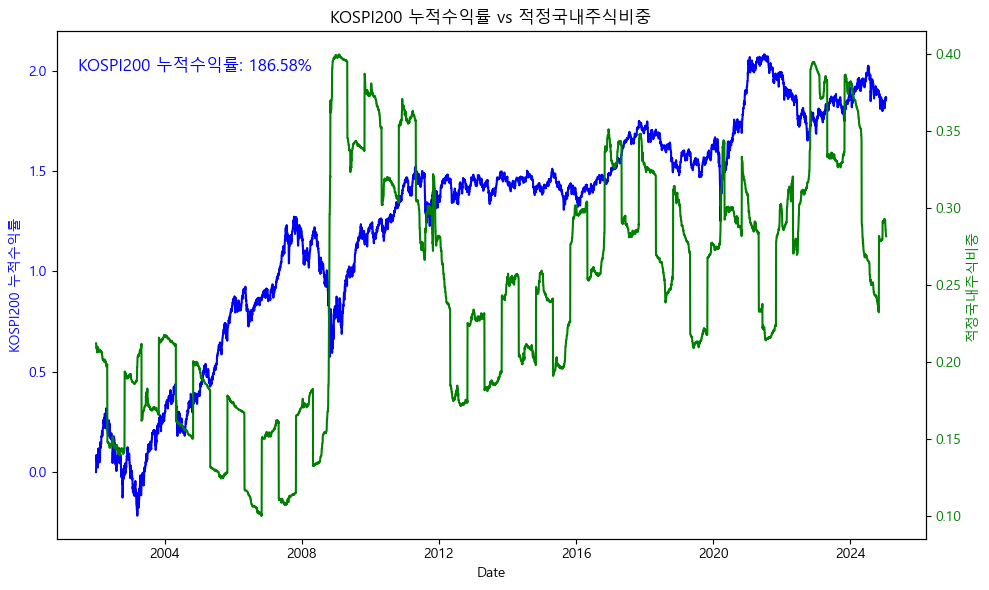

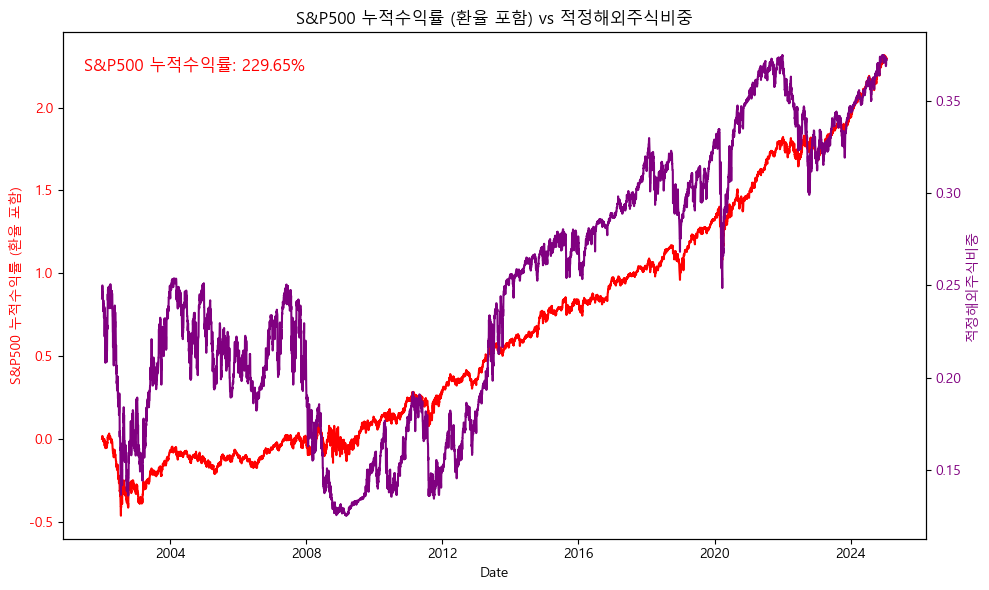

In [320]:
# 데이터 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Date 컬럼을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2. 첫 번째 그래프: 좌측축 KOSPI200_일수익률 누적 + 우측축 적정국내주식비중
fig, ax1 = plt.subplots(figsize=(10, 6))

# 좌측 Y축: 누적 KOSPI200_일수익률
ax1.plot(
    df['Date'], 
    df['KOSPI200_일수익률'].cumsum(), 
    color='blue', 
    label='KOSPI200 누적수익률'
)
ax1.set_ylabel('KOSPI200 누적수익률', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 좌측 상단에 KOSPI200 누적수익률 값 표시
kospi_cum_return = df['KOSPI200_일수익률'].cumsum().iloc[-1]
ax1.text(
    0.025, 0.95, f'KOSPI200 누적수익률: {kospi_cum_return*100:.2f}%', 
    transform=ax1.transAxes, 
    fontsize=12, color='blue', ha='left', va='top'
)

# 우측 Y축: 적정국내주식비중
ax2 = ax1.twinx()
ax2.plot(
    df['Date'], 
    df['적정국내주식비중'], 
    color='green', 
    label='적정국내주식비중'
)
ax2.set_ylabel('적정국내주식비중', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 제목 및 레이블
plt.title('KOSPI200 누적수익률 vs 적정국내주식비중')
ax1.set_xlabel('Date')
fig.tight_layout()
plt.show()

# 3. 두 번째 그래프: 좌측축 S&P500_일수익률_환율 누적 + 우측축 적정해외주식비중
fig, ax1 = plt.subplots(figsize=(10, 6))

# 좌측 Y축: 누적 S&P500_일수익률_환율
ax1.plot(
    df['Date'], 
    df['S&P500_일수익률_환율'].cumsum(), 
    color='red', 
    label='S&P500 누적수익률 (환율 포함)'
)
ax1.set_ylabel('S&P500 누적수익률 (환율 포함)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 좌측 상단에 S&P500 누적수익률 값 표시
sp500_cum_return = df['S&P500_일수익률_환율'].cumsum().iloc[-1]
ax1.text(
    0.025, 0.95, f'S&P500 누적수익률: {sp500_cum_return*100:.2f}%', 
    transform=ax1.transAxes, 
    fontsize=12, color='red', ha='left', va='top'
)

# 우측 Y축: 적정해외주식비중
ax2 = ax1.twinx()
ax2.plot(
    df['Date'], 
    df['적정해외주식비중'], 
    color='purple', 
    label='적정해외주식비중'
)
ax2.set_ylabel('적정해외주식비중', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# 제목 및 레이블
plt.title('S&P500 누적수익률 (환율 포함) vs 적정해외주식비중')
ax1.set_xlabel('Date')
fig.tight_layout()
plt.show()

In [ ]:
1. 비율&지수 누적 수익률(비중감안)

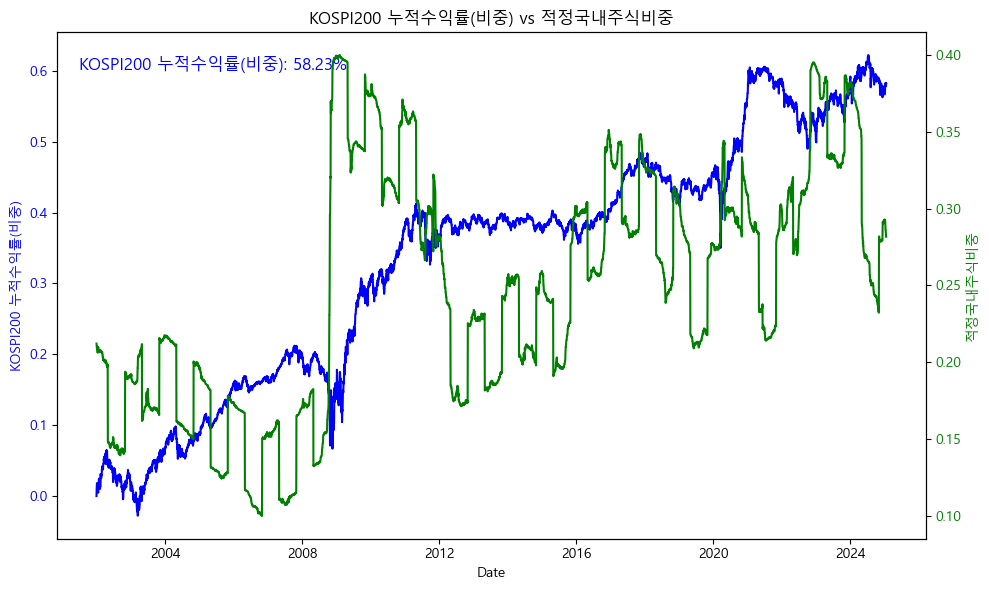

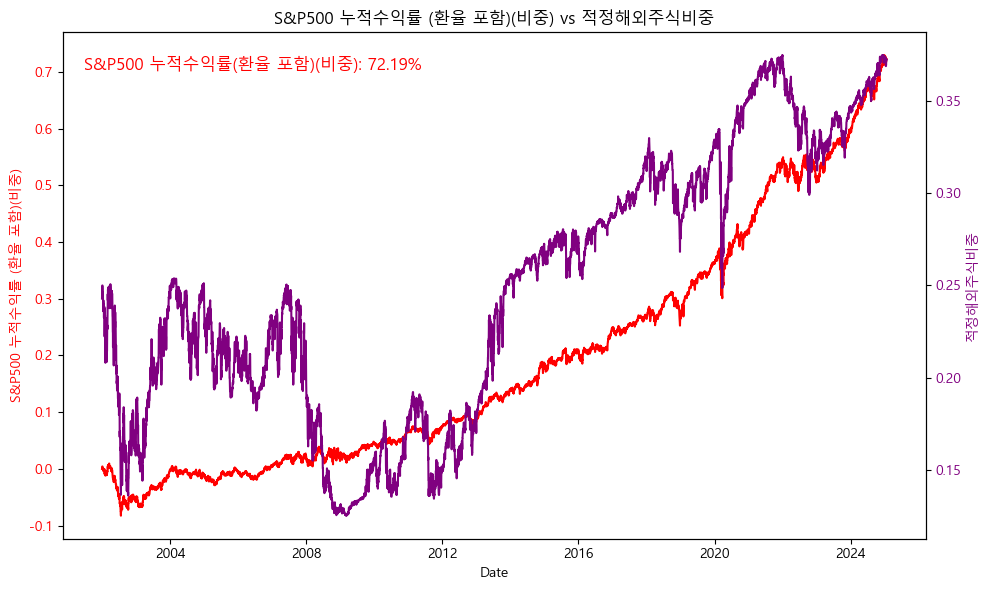

In [322]:
# 데이터 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Date 컬럼을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 1. KOSPI200 누적수익률(비중) 계산
df['KOSPI200_누적수익률_비중'] = (df['KOSPI200_일수익률'] * df['적정국내주식비중']).cumsum()

# 2. 첫 번째 그래프: 좌측축 KOSPI200_누적수익률_비중 + 우측축 적정국내주식비중
fig, ax1 = plt.subplots(figsize=(10, 6))

# 좌측 Y축: 누적 KOSPI200_누적수익률_비중
ax1.plot(
    df['Date'], 
    df['KOSPI200_누적수익률_비중'], 
    color='blue', 
    label='KOSPI200 누적수익률(비중)'
)
ax1.set_ylabel('KOSPI200 누적수익률(비중)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 좌측 상단에 KOSPI200 누적수익률(비중) 값 표시
kospi_cum_return_weighted = df['KOSPI200_누적수익률_비중'].iloc[-1]
ax1.text(
    0.025, 0.95, f'KOSPI200 누적수익률(비중): {kospi_cum_return_weighted*100:.2f}%', 
    transform=ax1.transAxes, 
    fontsize=12, color='blue', ha='left', va='top'
)

# 우측 Y축: 적정국내주식비중
ax2 = ax1.twinx()
ax2.plot(
    df['Date'], 
    df['적정국내주식비중'], 
    color='green', 
    label='적정국내주식비중'
)
ax2.set_ylabel('적정국내주식비중', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 제목 및 레이블
plt.title('KOSPI200 누적수익률(비중) vs 적정국내주식비중')
ax1.set_xlabel('Date')
fig.tight_layout()
plt.show()

# 3. S&P500 누적수익률(환율 포함)(비중) 계산
df['S&P500_누적수익률_비중'] = (df['S&P500_일수익률_환율'] * df['적정해외주식비중']).cumsum()

# 4. 두 번째 그래프: 좌측축 S&P500_누적수익률_비중 + 우측축 적정해외주식비중
fig, ax1 = plt.subplots(figsize=(10, 6))

# 좌측 Y축: 누적 S&P500_누적수익률_비중
ax1.plot(
    df['Date'], 
    df['S&P500_누적수익률_비중'], 
    color='red', 
    label='S&P500 누적수익률 (환율 포함)(비중)'
)
ax1.set_ylabel('S&P500 누적수익률 (환율 포함)(비중)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 좌측 상단에 S&P500 누적수익률(환율 포함)(비중) 값 표시
sp500_cum_return_weighted = df['S&P500_누적수익률_비중'].iloc[-1]
ax1.text(
    0.025, 0.95, f'S&P500 누적수익률(환율 포함)(비중): {sp500_cum_return_weighted*100:.2f}%', 
    transform=ax1.transAxes, 
    fontsize=12, color='red', ha='left', va='top'
)

# 우측 Y축: 적정해외주식비중
ax2 = ax1.twinx()
ax2.plot(
    df['Date'], 
    df['적정해외주식비중'], 
    color='purple', 
    label='적정해외주식비중'
)
ax2.set_ylabel('적정해외주식비중', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# 제목 및 레이블
plt.title('S&P500 누적수익률 (환율 포함)(비중) vs 적정해외주식비중')
ax1.set_xlabel('Date')
fig.tight_layout()
plt.show()